In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN , LSTM
from sklearn.preprocessing import MinMaxScaler


In [5]:
data = pd.read_csv('D:\Practice-assignments\Google_Stock_Price_Train.csv')

# Extract the 'Open' prices
prices = data['Open'].values

# Perform data scaling
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices.reshape(-1, 1))
# reshape converts [1,2,3] -> [[1],[2],[3]]

# Split the data into training and testing sets
train_size = int(len(scaled_prices) * 0.8)
train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:]

train_data.shape , test_data.shape

((1006, 1), (252, 1))

In [14]:
# Define the function to create input-output pairs
def create_sequences(data, seq_length):
    X = []
    Y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        Y.append(data[i+seq_length])
    # print(X,Y)
    return np.array(X), np.array(Y)

# create_sequences(test_data,3)


In [15]:
# Set the sequence length
sequence_length = 60

# Create training sequences
X_train, y_train = create_sequences(train_data, sequence_length)

# Create testing sequences
X_test, y_test = create_sequences(test_data, sequence_length)


In [10]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

Epoch 1/10
30/30 [==============================] - 1s 8ms/step - loss: 0.0280
Epoch 2/10
30/30 [==============================] - 0s 8ms/step - loss: 9.7046e-04
Epoch 3/10
30/30 [==============================] - 0s 8ms/step - loss: 7.1292e-04
Epoch 4/10
30/30 [==============================] - 0s 7ms/step - loss: 6.3265e-04
Epoch 5/10
30/30 [==============================] - 0s 9ms/step - loss: 6.2273e-04
Epoch 6/10
30/30 [==============================] - 0s 8ms/step - loss: 5.5795e-04
Epoch 7/10
30/30 [==============================] - 0s 8ms/step - loss: 5.5760e-04
Epoch 8/10
30/30 [==============================] - 0s 8ms/step - loss: 5.0027e-04
Epoch 9/10
30/30 [==============================] - 0s 7ms/step - loss: 5.5805e-04
Epoch 10/10
6/6 [==============================] - 0s 3ms/step - loss: 7.4221e-04
Test Loss: 0.0007422072230838239


In [11]:
# Make predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)


6/6 [==============================] - 0s 3ms/step


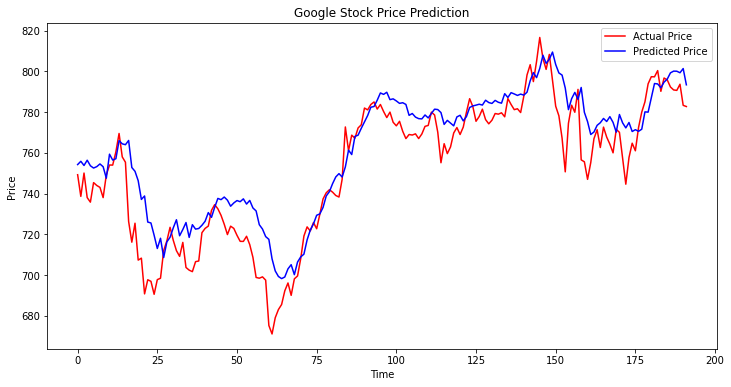

In [12]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(prices[train_size + sequence_length:], color='red', label='Actual Price')
plt.plot(predicted_prices, color='blue', label='Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()